In [ ]:
from  xgboost import XGBRegressor
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 28, 18
from pandas import *
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
train=pd.read_csv("./train.csv",parse_dates=['date'])
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0.0


In [ ]:
train.shape

(3000888, 6)

In [ ]:
len(set(train['date']))

1684

In [ ]:
test.shape

(28512, 5)

In [ ]:
test.shape[0]/16

1782.0

In [ ]:
len(set(test['date']))

16

In [ ]:
test.loc[test['family']=='POULTRY',:]

,id,date,store_nbr,family,onpromotion
28,3000916,2017-08-16,1,POULTRY,54.0
61,3000949,2017-08-16,10,POULTRY,54.0
94,3000982,2017-08-16,11,POULTRY,54.0
127,3001015,2017-08-16,12,POULTRY,54.0
160,3001048,2017-08-16,13,POULTRY,54.0
...,...,...,...,...,...
28375,3029263,2017-08-31,54,POULTRY,54.0
28408,3029296,2017-08-31,6,POULTRY,54.0
28441,3029329,2017-08-31,7,POULTRY,54.0
28474,3029362,2017-08-31,8,POULTRY,54.0


In [ ]:
train.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,15.0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,8.0
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148.0
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,10.0
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,2.0


In [ ]:
test=pd.read_csv("./test.csv")
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,20.0
1,3000889,2017-08-16,1,BABY CARE,1.0
2,3000890,2017-08-16,1,BEAUTY,8.0
3,3000891,2017-08-16,1,BEVERAGES,560.0
4,3000892,2017-08-16,1,BOOKS,1.0


In [ ]:
def family_counts(df):
    return df['family'].value_counts()

In [ ]:
family_counts(train),len(family_counts(train))

(BOOKS                         90936
 HOME APPLIANCES               90936
 PRODUCE                       90936
 HOME AND KITCHEN I            90936
 GROCERY I                     90936
 PLAYERS AND ELECTRONICS       90936
 MEATS                         90936
 BREAD/BAKERY                  90936
 GROCERY II                    90936
 CELEBRATION                   90936
 BEAUTY                        90936
 AUTOMOTIVE                    90936
 LINGERIE                      90936
 HOME AND KITCHEN II           90936
 BEVERAGES                     90936
 LAWN AND GARDEN               90936
 SCHOOL AND OFFICE SUPPLIES    90936
 SEAFOOD                       90936
 PERSONAL CARE                 90936
 DAIRY                         90936
 EGGS                          90936
 HARDWARE                      90936
 LIQUOR,WINE,BEER              90936
 DELI                          90936
 HOME CARE                     90936
 BABY CARE                     90936
 POULTRY                       90936
 

In [ ]:
family_counts(test),len(family_counts(test))

(PERSONAL CARE                 864
 POULTRY                       864
 LADIESWEAR                    864
 LIQUOR,WINE,BEER              864
 HOME APPLIANCES               864
 BEVERAGES                     864
 MAGAZINES                     864
 BOOKS                         864
 HOME AND KITCHEN II           864
 DELI                          864
 PRODUCE                       864
 CELEBRATION                   864
 BABY CARE                     864
 AUTOMOTIVE                    864
 SEAFOOD                       864
 DAIRY                         864
 BREAD/BAKERY                  864
 MEATS                         864
 GROCERY II                    864
 HOME AND KITCHEN I            864
 LAWN AND GARDEN               864
 PREPARED FOODS                864
 LINGERIE                      864
 EGGS                          864
 CLEANING                      864
 PLAYERS AND ELECTRONICS       864
 HARDWARE                      864
 BEAUTY                        864
 GROCERY I          

In [ ]:
def one_type_predict(family,plot=True):
    data=train.loc[train['family']==family,['date','sales']].groupby(by=['date']).sum()
    return data

In [ ]:
one_type_predict("POULTRY",plot=True)

,sales
date,
2013-01-01,42.637000
2013-01-02,13975.884938
2013-01-03,10674.393983
2013-01-04,10772.515038
2013-01-05,13475.009055
...,...
2017-08-11,25318.297990
2017-08-12,19134.510058
2017-08-13,20509.265004


In [ ]:
data=train.copy()
df_train_mag_sales = data.loc[(data['family'] == 'MAGAZINES') & ((data['date'] >= '2014-01-01') & (data['date'] <= '2017-06-30'))].groupby(['date']).sum().copy()
df_train_mag_sales = df_train_mag_sales.loc[:, 'sales':'sales']
df_train_mag_sales

,sales
date,
2014-01-01,1.0
2014-01-02,41.0
2014-01-03,24.0
2014-01-04,33.0
2014-01-05,23.0
...,...
2017-06-26,248.0
2017-06-27,200.0
2017-06-28,202.0


In [ ]:
df_test_mag_sales = data.loc[(data['family'] == 'MAGAZINES') & ((data['date'] >= '2017-07-1') & (data['date'] <= '2017-08-15'))].groupby(['date']).sum().copy()
df_test_mag_sales = df_test_mag_sales.loc[:, 'sales':'sales']
df_test_mag_sales 

,sales
date,
2017-07-01,292.0
2017-07-02,259.0
2017-07-03,167.0
2017-07-04,159.0
2017-07-05,160.0
2017-07-06,308.0
2017-07-07,426.0
2017-07-08,584.0
2017-07-09,506.0


<AxesSubplot:xlabel='date'>

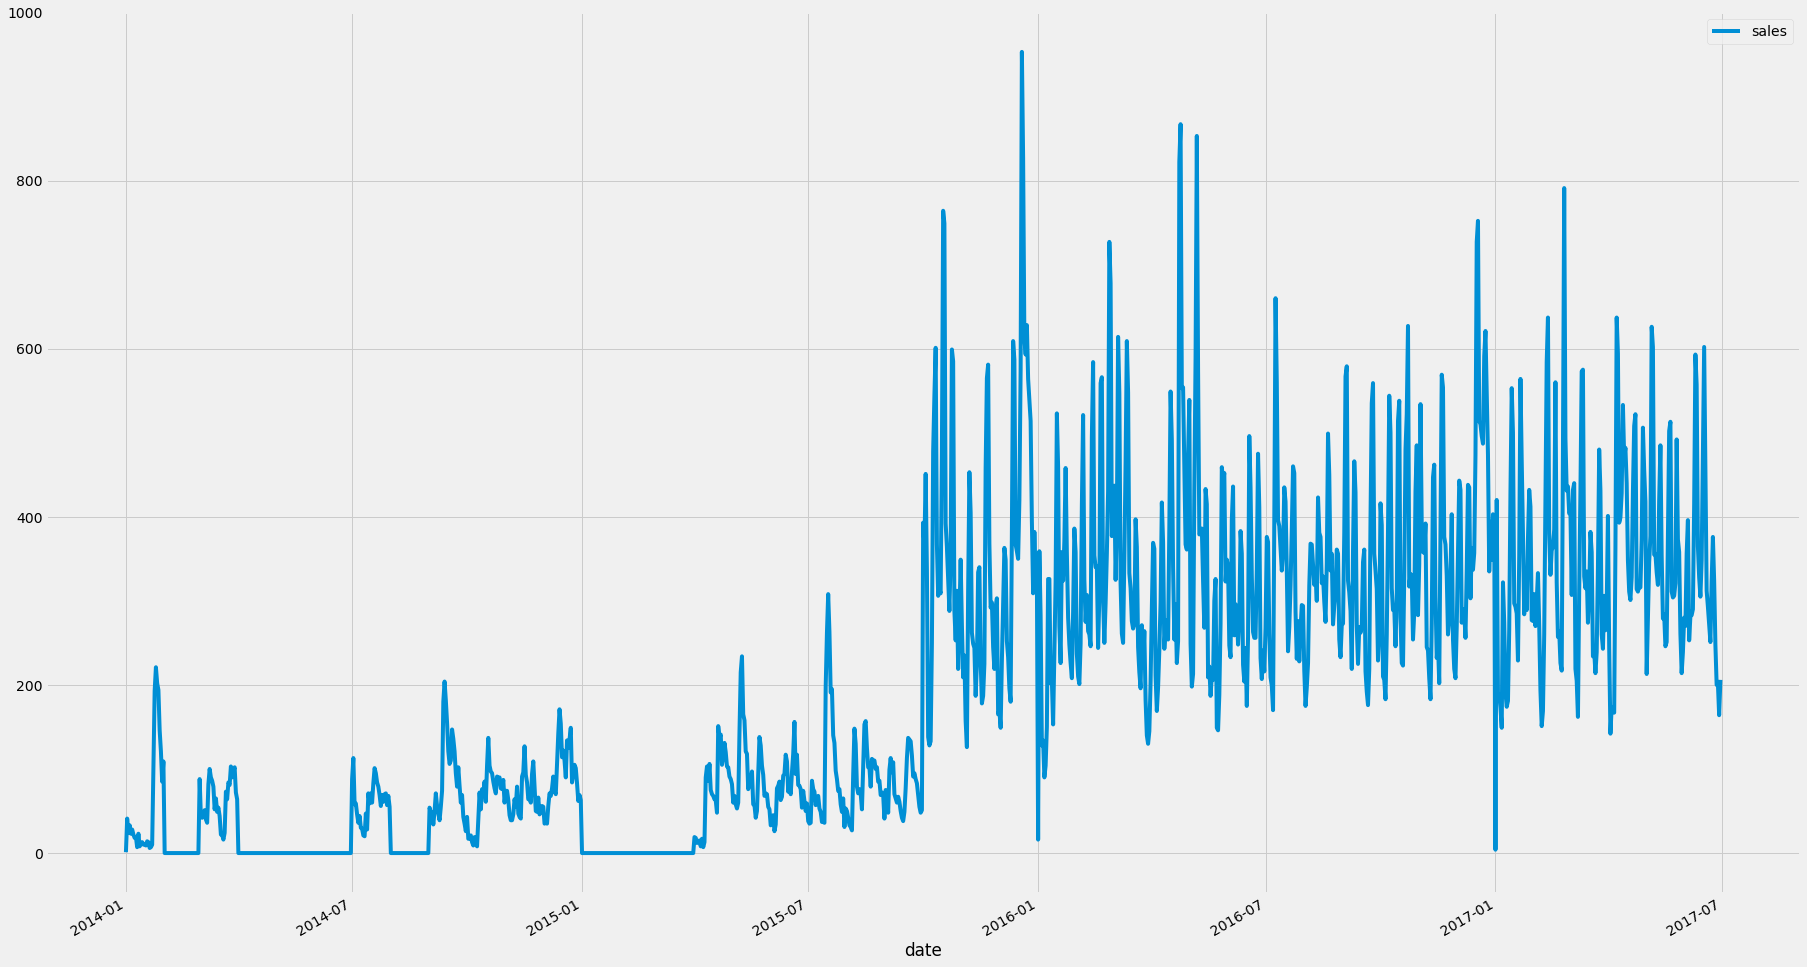

In [ ]:

df_train_mag_sales.plot()

<AxesSubplot:xlabel='date'>

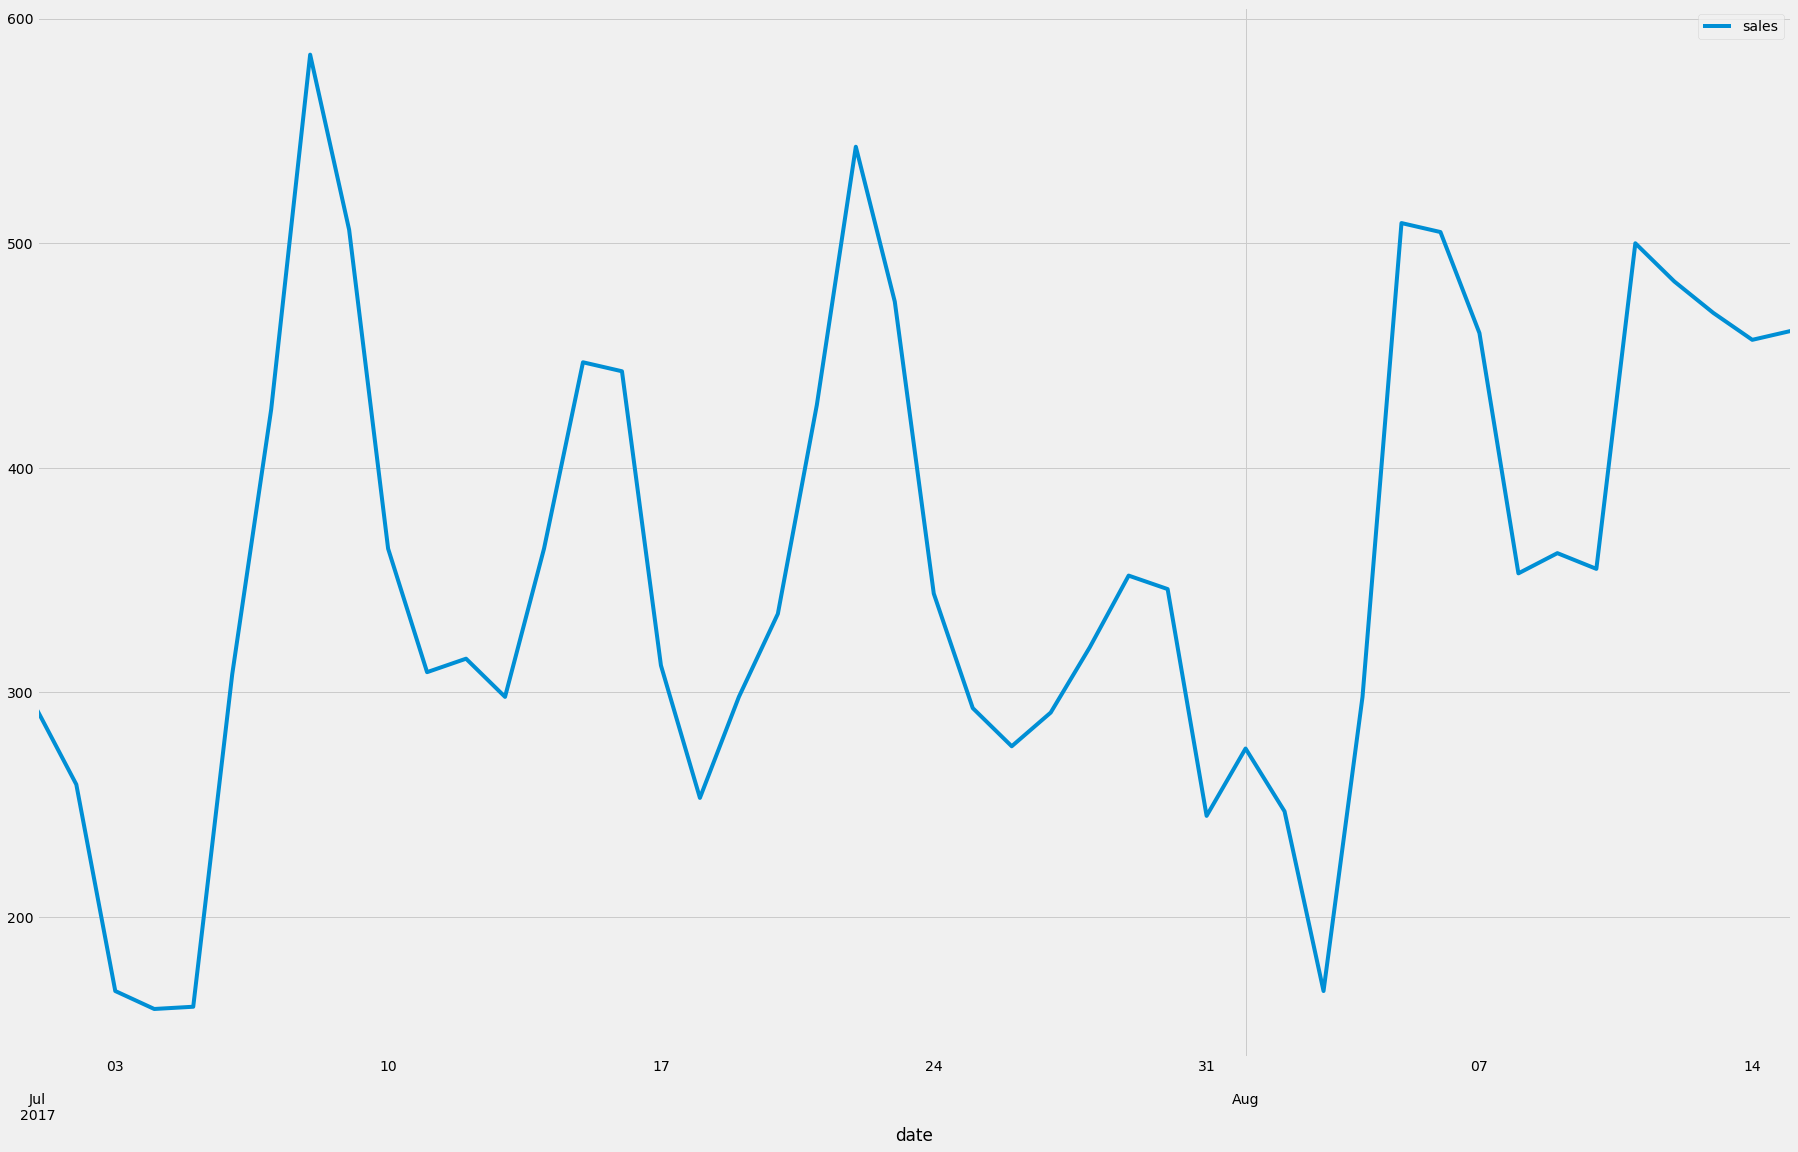

In [ ]:
df_test_mag_sales.plot()

In [ ]:
#turn time series forcasting to supervised 

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):

    n_vars = 1 if type(data) is list else data.shape[1]

    df = DataFrame(data)

    cols = list()

    # input series (t-n, ... t-1)

    for i in range(n_in, 0, -1):

        cols.append(df.shift(i))

    # predict series (t, t+1, ... t+n)

    for i in range(0, n_out):

        cols.append(df.shift(-i))

    # merge

    agg = concat(cols, axis=1)

    # drop all nan 

    if dropnan:

        agg.dropna(inplace=True)

    return agg.values

In [ ]:


def walk_forward_validation():

    predictions = list()

    # split dataset

    train, test = train_.copy(),test_.copy()

    # use train dataset as history

    history = [x for x in train]

    # train all dataset and each time shify

    for i in range(len(test)):


        testX, testy = test[i, :-1], test[i, -1]

        # xgboost prediction based on historical data

        yhat = xgboost_forecast(history, testX)

        # store the result

        predictions.append(yhat)

        history.append(test[i])

    # print the result

        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))

    # RMSE for model evaluation

    error = np.sqrt(mean_squared_error(test[:, 1], predictions))

    return error, test[:, 1], predictions

In [ ]:

def xgboost_forecast(train, testX):


    train = np.array(train)

    trainX, trainy = train[:, :-1], train[:, -1]

    # xgbregresser

    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)

    model.fit(trainX, trainy)

    # forecast

    yhat = model.predict(np.array([testX]))

    return yhat[0]

In [ ]:
df=data.groupby(by='date').sum()
df.head()

,id,store_nbr,sales,onpromotion
date,,,,
2013-01-01,1586871,49005,2511.618999,0.0
2013-01-02,4762395,49005,496092.417944,0.0
2013-01-03,7937919,49005,361461.231124,0.0
2013-01-04,11113443,49005,354459.677093,0.0
2013-01-05,14288967,49005,477350.121229,0.0


In [ ]:
train_values = df_train_mag_sales.values
test_values = df_test_mag_sales.values

# turn time series into supervised one

In [ ]:
# find the best shift
rmse_init=10000
best_shfit=0
best_predict=None
y_s=None
for i in range(7,15):
    train_= series_to_supervised(train_values, n_in=i)
    test_= series_to_supervised(test_values, n_in=i)
    rmse, y, yhat = walk_forward_validation()
    print(f'shfit={i},RMSE: %.3f' % rmse)
    if rmse<rmse_init:
        rmse_init=rmse
        best_shfit=i
        best_predict=yhat
        y_s=y
        
print("best shfit:",best_shfit)
print("lowest RMSE:",rmse_init)
# expected vs forecast

/Users/huangboyuan/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=584.0, predicted=443.9
>expected=506.0, predicted=518.2
>expected=364.0, predicted=340.9
>expected=309.0, predicted=366.6
>expected=315.0, predicted=325.8
>expected=298.0, predicted=289.0
>expected=364.0, predicted=389.1
>expected=447.0, predicted=383.8
>expected=443.0, predicted=397.3
>expected=312.0, predicted=327.8
>expected=253.0, predicted=300.8
>expected=298.0, predicted=292.4
>expected=335.0, predicted=251.8
>expected=428.0, predicted=365.9
>expected=543.0, predicted=516.4
>expected=474.0, predicted=425.0
>expected=344.0, predicted=320.0
>expected=293.0, predicted=338.8
>expected=276.0, predicted=295.3
>expected=291.0, predicted=235.6
>expected=320.0, predicted=379.9
>expected=352.0, predicted=407.8
>expected=346.0, predicted=296.3
>expected=245.0, predicted=301.1
>expected=275.0, predicted=207.0
>expected=247.0, predicted=291.0
>expected=167.0, predicted=266.3
>expected=298.0, predicted=273.7
>expected=509.0, predicted=423.1
>expected=505.0, predicted=523.2
>expected=

/Users/huangboyuan/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=506.0, predicted=518.8
>expected=364.0, predicted=340.8
>expected=309.0, predicted=360.1
>expected=315.0, predicted=327.5
>expected=298.0, predicted=293.2
>expected=364.0, predicted=415.5
>expected=447.0, predicted=471.0
>expected=443.0, predicted=386.4
>expected=312.0, predicted=342.5
>expected=253.0, predicted=254.5
>expected=298.0, predicted=302.0
>expected=335.0, predicted=303.2
>expected=428.0, predicted=367.5
>expected=543.0, predicted=498.1
>expected=474.0, predicted=534.0
>expected=344.0, predicted=305.0
>expected=293.0, predicted=319.1
>expected=276.0, predicted=297.3
>expected=291.0, predicted=274.9
>expected=320.0, predicted=343.7
>expected=352.0, predicted=367.7
>expected=346.0, predicted=343.5
>expected=245.0, predicted=259.1
>expected=275.0, predicted=191.9
>expected=247.0, predicted=262.4
>expected=167.0, predicted=264.5
>expected=298.0, predicted=247.6
>expected=509.0, predicted=453.5
>expected=505.0, predicted=473.2
>expected=460.0, predicted=351.8
>expected=

/Users/huangboyuan/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=364.0, predicted=334.4
>expected=309.0, predicted=350.9
>expected=315.0, predicted=327.3
>expected=298.0, predicted=318.0
>expected=364.0, predicted=382.2
>expected=447.0, predicted=414.0
>expected=443.0, predicted=325.9
>expected=312.0, predicted=297.7
>expected=253.0, predicted=290.0
>expected=298.0, predicted=276.4
>expected=335.0, predicted=288.5
>expected=428.0, predicted=400.7
>expected=543.0, predicted=536.3
>expected=474.0, predicted=579.7
>expected=344.0, predicted=343.5
>expected=293.0, predicted=327.6
>expected=276.0, predicted=329.5
>expected=291.0, predicted=263.9
>expected=320.0, predicted=353.8
>expected=352.0, predicted=402.6
>expected=346.0, predicted=336.3
>expected=245.0, predicted=286.0
>expected=275.0, predicted=203.9
>expected=247.0, predicted=287.1
>expected=167.0, predicted=266.8
>expected=298.0, predicted=284.7
>expected=509.0, predicted=442.9
>expected=505.0, predicted=509.5
>expected=460.0, predicted=381.0
>expected=353.0, predicted=351.8
>expected=

/Users/huangboyuan/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=309.0, predicted=352.0
>expected=315.0, predicted=331.6
>expected=298.0, predicted=305.8
>expected=364.0, predicted=383.0
>expected=447.0, predicted=477.4
>expected=443.0, predicted=358.5
>expected=312.0, predicted=310.2
>expected=253.0, predicted=280.2
>expected=298.0, predicted=310.5
>expected=335.0, predicted=260.8
>expected=428.0, predicted=369.0
>expected=543.0, predicted=579.5
>expected=474.0, predicted=559.5
>expected=344.0, predicted=327.1
>expected=293.0, predicted=333.8
>expected=276.0, predicted=323.8
>expected=291.0, predicted=230.9
>expected=320.0, predicted=354.2
>expected=352.0, predicted=419.8
>expected=346.0, predicted=335.3
>expected=245.0, predicted=230.0
>expected=275.0, predicted=191.7
>expected=247.0, predicted=269.8
>expected=167.0, predicted=295.0
>expected=298.0, predicted=243.6
>expected=509.0, predicted=409.3
>expected=505.0, predicted=495.3
>expected=460.0, predicted=397.7
>expected=353.0, predicted=339.6
>expected=362.0, predicted=345.4
>expected=

/Users/huangboyuan/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=315.0, predicted=329.9
>expected=298.0, predicted=303.8
>expected=364.0, predicted=361.9
>expected=447.0, predicted=451.1
>expected=443.0, predicted=339.6
>expected=312.0, predicted=314.8
>expected=253.0, predicted=272.8
>expected=298.0, predicted=262.8
>expected=335.0, predicted=322.7
>expected=428.0, predicted=365.1
>expected=543.0, predicted=570.5
>expected=474.0, predicted=590.4
>expected=344.0, predicted=340.5
>expected=293.0, predicted=323.0
>expected=276.0, predicted=291.8
>expected=291.0, predicted=249.1
>expected=320.0, predicted=371.9
>expected=352.0, predicted=455.4
>expected=346.0, predicted=366.1
>expected=245.0, predicted=261.4
>expected=275.0, predicted=189.7
>expected=247.0, predicted=270.6
>expected=167.0, predicted=258.6
>expected=298.0, predicted=239.7
>expected=509.0, predicted=444.8
>expected=505.0, predicted=471.4
>expected=460.0, predicted=374.8
>expected=353.0, predicted=349.8
>expected=362.0, predicted=337.3
>expected=355.0, predicted=372.3
>expected=

/Users/huangboyuan/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=298.0, predicted=315.9
>expected=364.0, predicted=360.3
>expected=447.0, predicted=487.0
>expected=443.0, predicted=309.6
>expected=312.0, predicted=324.1
>expected=253.0, predicted=283.8
>expected=298.0, predicted=277.8
>expected=335.0, predicted=274.6
>expected=428.0, predicted=369.2
>expected=543.0, predicted=573.6
>expected=474.0, predicted=591.7
>expected=344.0, predicted=308.8
>expected=293.0, predicted=280.7
>expected=276.0, predicted=318.9
>expected=291.0, predicted=235.7
>expected=320.0, predicted=337.8
>expected=352.0, predicted=430.0
>expected=346.0, predicted=330.8
>expected=245.0, predicted=267.5
>expected=275.0, predicted=195.3
>expected=247.0, predicted=285.9
>expected=167.0, predicted=241.5
>expected=298.0, predicted=206.4
>expected=509.0, predicted=415.5
>expected=505.0, predicted=514.9
>expected=460.0, predicted=393.8
>expected=353.0, predicted=351.1
>expected=362.0, predicted=336.9
>expected=355.0, predicted=357.8
>expected=500.0, predicted=337.7
>expected=

/Users/huangboyuan/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=364.0, predicted=379.3
>expected=447.0, predicted=442.7
>expected=443.0, predicted=292.6
>expected=312.0, predicted=285.1
>expected=253.0, predicted=255.8
>expected=298.0, predicted=280.5
>expected=335.0, predicted=282.5
>expected=428.0, predicted=348.4
>expected=543.0, predicted=559.7
>expected=474.0, predicted=565.4
>expected=344.0, predicted=346.5
>expected=293.0, predicted=325.0
>expected=276.0, predicted=297.4
>expected=291.0, predicted=277.2
>expected=320.0, predicted=337.0
>expected=352.0, predicted=390.6
>expected=346.0, predicted=381.7
>expected=245.0, predicted=264.0
>expected=275.0, predicted=208.3
>expected=247.0, predicted=268.0
>expected=167.0, predicted=224.8
>expected=298.0, predicted=194.3
>expected=509.0, predicted=332.5
>expected=505.0, predicted=477.6
>expected=460.0, predicted=385.5
>expected=353.0, predicted=366.3
>expected=362.0, predicted=326.7
>expected=355.0, predicted=328.3
>expected=500.0, predicted=366.1
>expected=483.0, predicted=529.4
>expected=

/Users/huangboyuan/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=447.0, predicted=471.2
>expected=443.0, predicted=300.0
>expected=312.0, predicted=315.7
>expected=253.0, predicted=291.0
>expected=298.0, predicted=277.6
>expected=335.0, predicted=291.8
>expected=428.0, predicted=338.1
>expected=543.0, predicted=619.4
>expected=474.0, predicted=542.6
>expected=344.0, predicted=359.6
>expected=293.0, predicted=302.1
>expected=276.0, predicted=288.8
>expected=291.0, predicted=253.9
>expected=320.0, predicted=362.8
>expected=352.0, predicted=391.2
>expected=346.0, predicted=393.8
>expected=245.0, predicted=253.9
>expected=275.0, predicted=182.7
>expected=247.0, predicted=284.4
>expected=167.0, predicted=245.5
>expected=298.0, predicted=256.2
>expected=509.0, predicted=410.9
>expected=505.0, predicted=487.6
>expected=460.0, predicted=397.5
>expected=353.0, predicted=356.3
>expected=362.0, predicted=345.2
>expected=355.0, predicted=326.6
>expected=500.0, predicted=325.1
>expected=483.0, predicted=579.0
>expected=469.0, predicted=502.0
>expected=

/Users/huangboyuan/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=506.0, predicted=518.8
>expected=364.0, predicted=340.8
>expected=309.0, predicted=360.1
>expected=315.0, predicted=327.5
>expected=298.0, predicted=293.2
>expected=364.0, predicted=415.5
>expected=447.0, predicted=471.0
>expected=443.0, predicted=386.4
>expected=312.0, predicted=342.5
>expected=253.0, predicted=254.5
>expected=298.0, predicted=302.0
>expected=335.0, predicted=303.2
>expected=428.0, predicted=367.5
>expected=543.0, predicted=498.1
>expected=474.0, predicted=534.0
>expected=344.0, predicted=305.0
>expected=293.0, predicted=319.1
>expected=276.0, predicted=297.3
>expected=291.0, predicted=274.9
>expected=320.0, predicted=343.7
>expected=352.0, predicted=367.7
>expected=346.0, predicted=343.5
>expected=245.0, predicted=259.1
>expected=275.0, predicted=191.9
>expected=247.0, predicted=262.4
>expected=167.0, predicted=264.5
>expected=298.0, predicted=247.6
>expected=509.0, predicted=453.5
>expected=505.0, predicted=473.2
>expected=460.0, predicted=351.8
>expected=

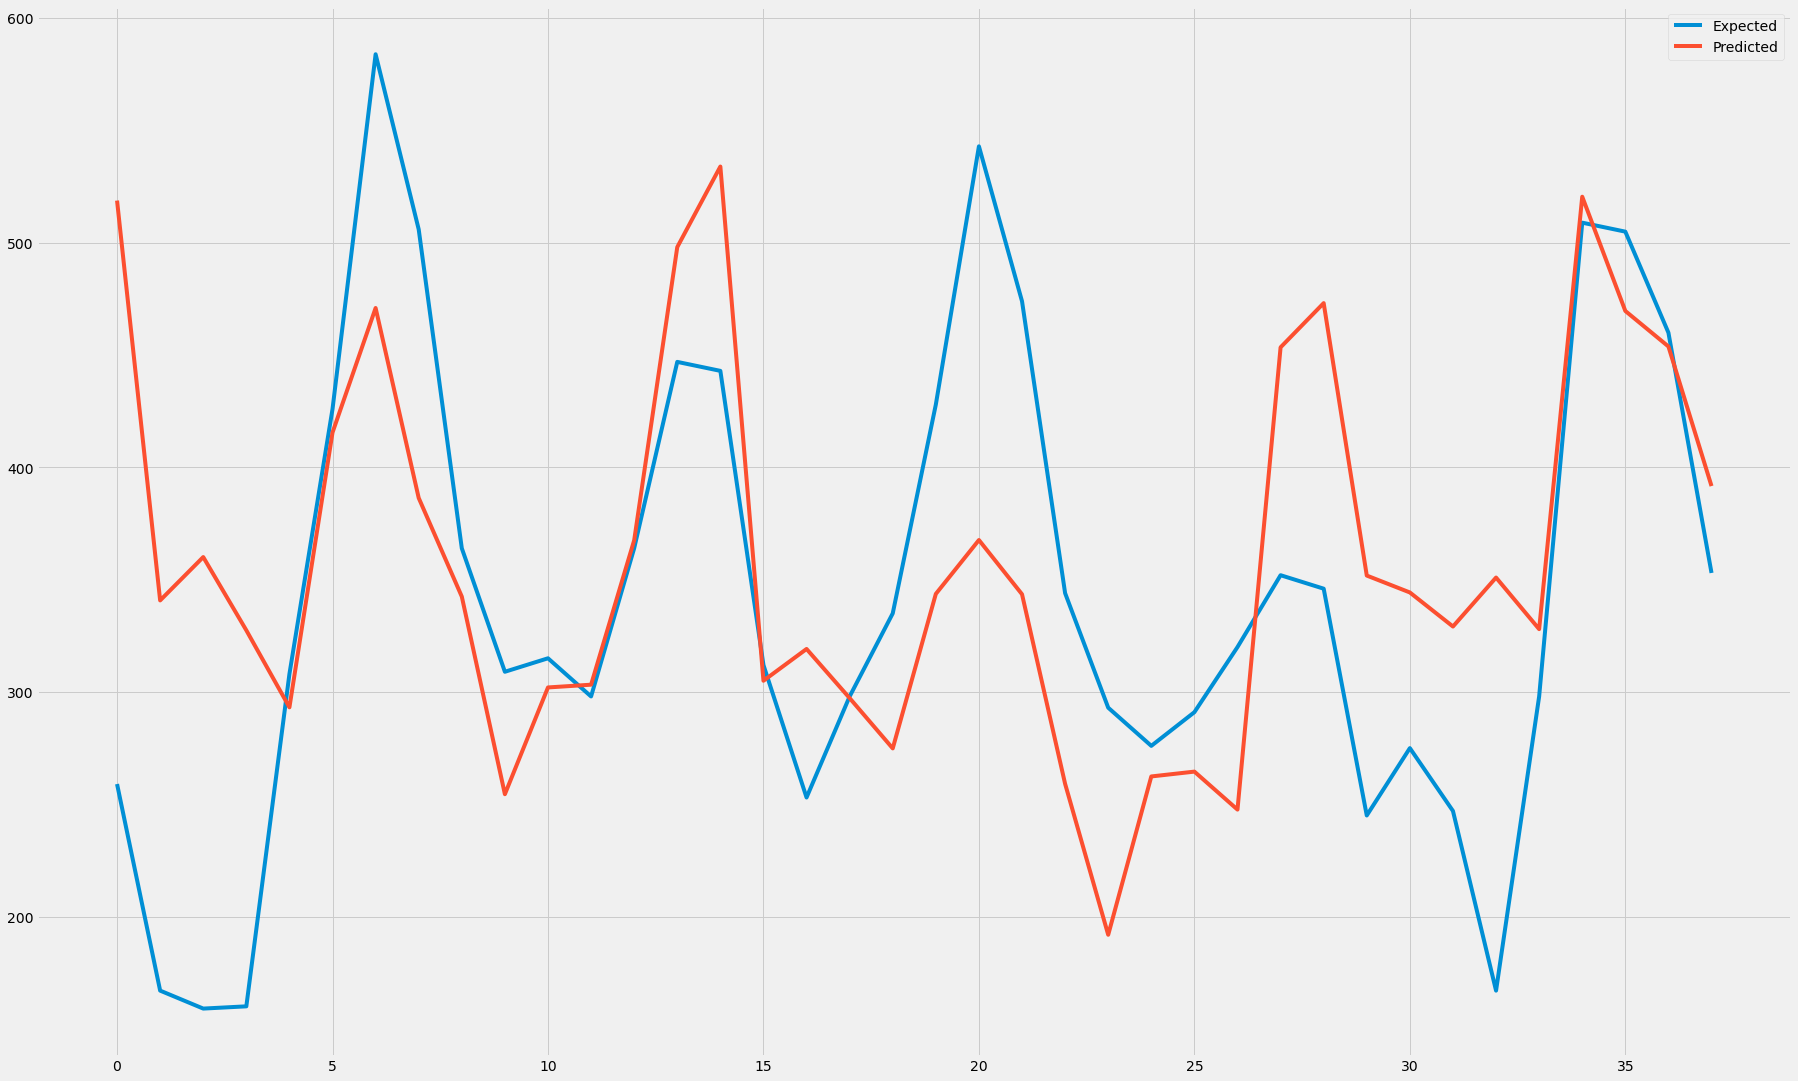

In [ ]:
train_= series_to_supervised(train_values, n_in=best_shfit)
test_= series_to_supervised(test_values, n_in=best_shfit)
rmse, y, yhat = walk_forward_validation()
plt.plot(y, label='Expected')

plt.plot(yhat, label='Predicted')

plt.legend()

plt.show()